# CLASSIFICAÇÃO DE EMPRESAS PARA INVESTIMENTO A LONGO PRAZO 

## Algoritmo de classificação + Análise e exploração profunda dos dados relacionados a empresas para investimento.

O intuito do algoritmo é definir se vale ou não investir em uma empresa baseado em diversas caracteristicas (features). A feature principal é chamada de Situação sendo um valor contendo as seguintes classes : BOA, MEDIO E RUIM.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from pandas_datareader import data
import yfinance as yf
import os
import matplotlib.image as mpimg
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,KFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold,KFold,RepeatedKFold,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle as pkl


In [20]:
"""CLASSIFICAR EMPRESAS PARA INVESTIMENTO A LONGO PRAZO"""
dataset = pd.read_excel('python_codes/database/BD Completo.xlsx')
plt.style.use('Solarize_Light2')


In [21]:
dataset

,Situação,Empresa,Segmento,Valor de M.,EV,Majoritar.,Pes. Fisicas,Categoria,LPA,LPA desconctado,...,FCO,FCI,FCF,FCT,FCL,FCI/LL,CAPEX,FCL CAPEX,CAPEX/LL,CAPEX/FCO
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,"Brasiliana Participaçoes (98,26%)",15969.0,alerta,0.57,0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,"Aes Holdings Brasil ltda. (61,57%)",18681.0,dividendos,0.18,0.18,...,836.0,-126.0,-728.0,-18.0,710.0,0.68,-139.0,696.0,26.00,17.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,contour global do brasil participações ltda (9...,1898.0,alerta,0.16,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,"neoenergia s.a (87,84)",8.0,alerta,0.21,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,"admistradora fortaliza ltda (89,14%)",11290.0,crescimento moderado,0.60,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomésticos,5.034333e+09,4.615333e+09,"whirlpool do brasil ltda (49,94%)",NaN,dividendos,0.21,0.21,...,768.0,-212.0,-519.0,35.0,555.0,50.00,-207.0,560.0,0.48,28.0
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,NaN,NaN,"ocean wilsons holdings limited (58,30%)",176.0,alerta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,"sajutha-rio participações s.a (94,08%)",3604.0,alerta,-0.52,-0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,ruim,zain participações s.a opzi,outros,NaN,NaN,NaN,2.0,alerta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


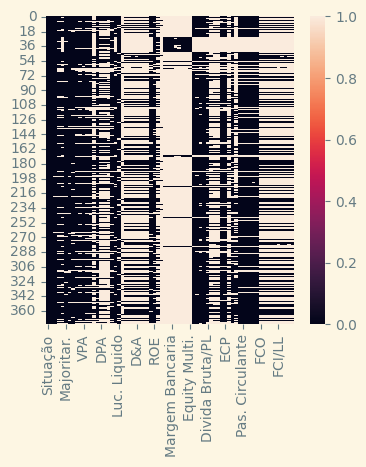

In [22]:
plt.figure(figsize= (4,4))
sns.heatmap(dataset.isnull())
dataset.columns = dataset.columns.str.strip().str.upper()


In [23]:
dataset.isnull().sum()

SITUAÇÃO         0
EMPRESA          0
SEGMENTO         3
VALOR DE M.     58
EV              92
              ... 
FCI/LL         242
CAPEX          241
FCL CAPEX      239
CAPEX/LL       242
CAPEX/FCO      241
Length: 70, dtype: int64

In [24]:
for i in dataset.columns:
    if dataset[i].isnull().sum() > 200:
        dataset = dataset.drop(f'{i}',axis=1)


In [25]:
dataset.isnull().sum()

SITUAÇÃO             0
EMPRESA              0
SEGMENTO             3
VALOR DE M.         58
EV                  92
MAJORITAR.          16
PES. FISICAS        19
CATEGORIA           29
LPA                 41
LPA DESCONCTADO     60
VPA                 38
P/L                 61
P/L DESCONTADO      66
P/VPA               64
MARGEM SEGURANÇA    56
REC. LIQUIDA        51
LUC. LIQUIDO        52
MARGEM LIQUIDA      59
ROE                 49
PATRI. LIQUIDO.1    33
CAIXA               41
DIVIDA BRUTA        54
DIVIDA LIQUIDA      36
DIVIDA BRUTA/PL     81
EF                  66
ECP                 67
EM                  83
AT. CIRCULANTE      60
PAS. CIRCULANTE     60
CAIXA.1             60
LIQ. CORRENTE       60
LIQ. IMEDIATA       61
CAPITAL DE GIRO     61
dtype: int64

<Axes: >

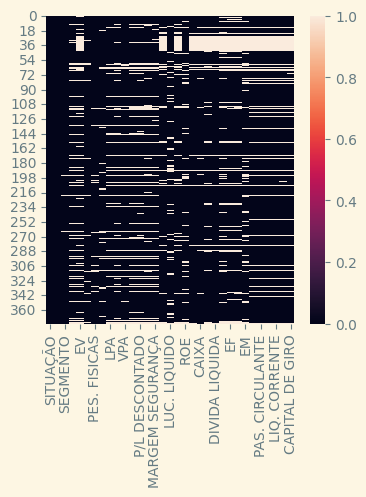

In [26]:
plt.figure(figsize= (4,4))
sns.heatmap(dataset.isnull())


In [27]:
#SELECIONAR CATEGORIGOS E NUMÉRICOS
cat_attribs = dataset.select_dtypes(include=['object']).columns.tolist()
num_attribs = dataset.select_dtypes(include=['number']).columns.tolist()

In [28]:
cat_attribs,num_attribs

(['SITUAÇÃO', 'EMPRESA', 'SEGMENTO', 'MAJORITAR.', 'CATEGORIA'],
 ['VALOR DE M.',
  'EV',
  'PES. FISICAS',
  'LPA',
  'LPA DESCONCTADO',
  'VPA',
  'P/L',
  'P/L DESCONTADO',
  'P/VPA',
  'MARGEM SEGURANÇA',
  'REC. LIQUIDA',
  'LUC. LIQUIDO',
  'MARGEM LIQUIDA',
  'ROE',
  'PATRI. LIQUIDO.1',
  'CAIXA',
  'DIVIDA BRUTA',
  'DIVIDA LIQUIDA',
  'DIVIDA BRUTA/PL',
  'EF',
  'ECP',
  'EM',
  'AT. CIRCULANTE',
  'PAS. CIRCULANTE',
  'CAIXA.1',
  'LIQ. CORRENTE',
  'LIQ. IMEDIATA',
  'CAPITAL DE GIRO'])

In [29]:
dataset[num_attribs] = dataset[num_attribs].fillna(dataset[num_attribs].mean(),axis=0)


In [30]:
dataset.isnull().sum()


SITUAÇÃO             0
EMPRESA              0
SEGMENTO             3
VALOR DE M.          0
EV                   0
MAJORITAR.          16
PES. FISICAS         0
CATEGORIA           29
LPA                  0
LPA DESCONCTADO      0
VPA                  0
P/L                  0
P/L DESCONTADO       0
P/VPA                0
MARGEM SEGURANÇA     0
REC. LIQUIDA         0
LUC. LIQUIDO         0
MARGEM LIQUIDA       0
ROE                  0
PATRI. LIQUIDO.1     0
CAIXA                0
DIVIDA BRUTA         0
DIVIDA LIQUIDA       0
DIVIDA BRUTA/PL      0
EF                   0
ECP                  0
EM                   0
AT. CIRCULANTE       0
PAS. CIRCULANTE      0
CAIXA.1              0
LIQ. CORRENTE        0
LIQ. IMEDIATA        0
CAPITAL DE GIRO      0
dtype: int64

In [31]:
del dataset['MAJORITAR.']


In [32]:
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)


In [33]:
dataset.isnull().sum()

SITUAÇÃO            0
EMPRESA             0
SEGMENTO            0
VALOR DE M.         0
EV                  0
PES. FISICAS        0
CATEGORIA           0
LPA                 0
LPA DESCONCTADO     0
VPA                 0
P/L                 0
P/L DESCONTADO      0
P/VPA               0
MARGEM SEGURANÇA    0
REC. LIQUIDA        0
LUC. LIQUIDO        0
MARGEM LIQUIDA      0
ROE                 0
PATRI. LIQUIDO.1    0
CAIXA               0
DIVIDA BRUTA        0
DIVIDA LIQUIDA      0
DIVIDA BRUTA/PL     0
EF                  0
ECP                 0
EM                  0
AT. CIRCULANTE      0
PAS. CIRCULANTE     0
CAIXA.1             0
LIQ. CORRENTE       0
LIQ. IMEDIATA       0
CAPITAL DE GIRO     0
dtype: int64

C:\Users\Edu\AppData\Local\Temp\ipykernel_14700\4056101978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SITUAÇÃO', data=dataset, palette='Set1', legend=False)


<Axes: xlabel='SITUAÇÃO', ylabel='count'>

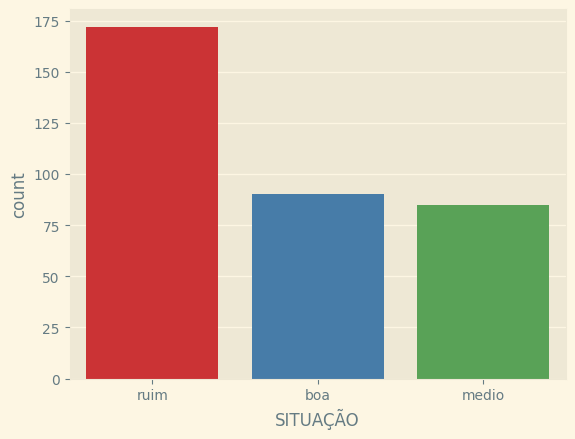

In [44]:
sns.countplot(x='SITUAÇÃO', data=dataset, palette='Set1', legend=False)

In [45]:
unique_segments, counts = np.unique(dataset['SEGMENTO'],return_counts=True)

In [48]:
unique_segments

array(['acessorios', 'acessórios', 'agriculltura', 'agricultura',
       'agua e saneamento', 'alimentos', 'alimentos diversos',
       'aluguel de carros', 'armas e munições', 'artefatos de cobre',
       'artefatos de ferro e aço', 'automoveis e motocicletas',
       'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
       'café', 'calçados', 'carnes e derivados',
       'cervejas e refrigerantes', 'compressores e outros',
       'computadores e equipamentos', 'construção civil',
       'construção pesada', 'corretoras de seguros', 'edificações',
       'eletrodomesticos', 'eletrodomésticos', 'embalagens',
       'energia eletrica', 'engenharia construtiva',
       'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
       'exploração de imoveis', 'exploração de rodovias',
       'exploração, refino e distribuição', 'fertilizantes e defensivos',
       'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
       'holdings diversificadas', 'hote

In [49]:
counts

array([ 1,  1,  1,  3,  4,  1,  3,  2,  1,  1,  5,  4,  3, 27,  1,  2,  2,
        4,  6,  1,  1,  2,  2,  4,  1, 17,  3,  1,  2, 40,  1,  1,  1,  2,
       10,  5,  6,  2, 16,  2,  3, 11,  2,  2,  2,  2,  2,  5,  1,  2,  1,
        2,  1,  6,  6,  3,  1,  1,  1,  1, 13,  5,  3,  1,  2,  5,  4,  2,
        1,  1,  3,  2,  4,  1,  1,  1,  1,  3,  2,  4,  1,  2,  2,  2,  3,
        1,  2,  1,  7,  6,  2,  4,  2,  2,  2,  1,  1], dtype=int64)

In [50]:
dataset['SEGMENTO'] = dataset['SEGMENTO'].astype(str)


In [51]:
def corrige_segmentos(texto):
    segmento = ''
    
    if texto == 'acessórios':
        segmento = 'acessorio'

    elif texto == 'acessorios':
        segmento = 'acessorio'

    elif texto == 'agriculltura':
        segmento = 'agricultura'

    elif texto == 'alimentos diversos':
        segmento = 'alimentos'
    
    elif texto == 'eletrodomésticos':
        segmento = 'eletrodomesticos'

    elif texto == 'equipamentos e serviços':
        segmento = 'equipamentos'

    elif texto == 'mateial rodoviario': 
        segmento = 'material rodoviario'

    elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
        segmento = 'hospitalar'

    elif texto == 'serviços de apoio e armazenamento':
        segmento = 'serviços de apoio e armazenagem'

    elif texto == 'serviços diversos s.a ctax':
        segmento = 'serviços diversos'

    elif texto == 'siderurgia':
        segmento = 'siderurgica'

    elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
        segmento = 'credito'

    elif texto == 'tansporte aereo':
        segmento = 'transporte aereo'

    else :
        segmento = texto

    return segmento
dataset['SEGMENTO'] = dataset['SEGMENTO'].apply(corrige_segmentos)

In [54]:
unique_segments, counts = np.unique(dataset['CATEGORIA'],return_counts=True)
print(counts)

[243  17   1  48  36   2]


In [55]:
def corrige_categoria(texto):
    categoria = ''
    if texto == 'crescimento ':
        categoria = 'crescimento'

    else:
        categoria = texto
    return categoria

dataset['CATEGORIA'] = dataset['CATEGORIA'].apply(corrige_categoria)

In [56]:
np.unique(dataset['CATEGORIA'],return_counts=True)

(array(['alerta', 'crescimento', 'crescimento moderado', 'dividendos',
        'dividendos + crescimento'], dtype=object),
 array([243,  18,  48,  36,   2], dtype=int64))

C:\Users\Edu\AppData\Local\Temp\ipykernel_14700\339226440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CATEGORIA', data=dataset,palette='Set1')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'alerta'),
  Text(1, 0, 'dividendos'),
  Text(2, 0, 'crescimento moderado'),
  Text(3, 0, 'crescimento'),
  Text(4, 0, 'dividendos + crescimento')])

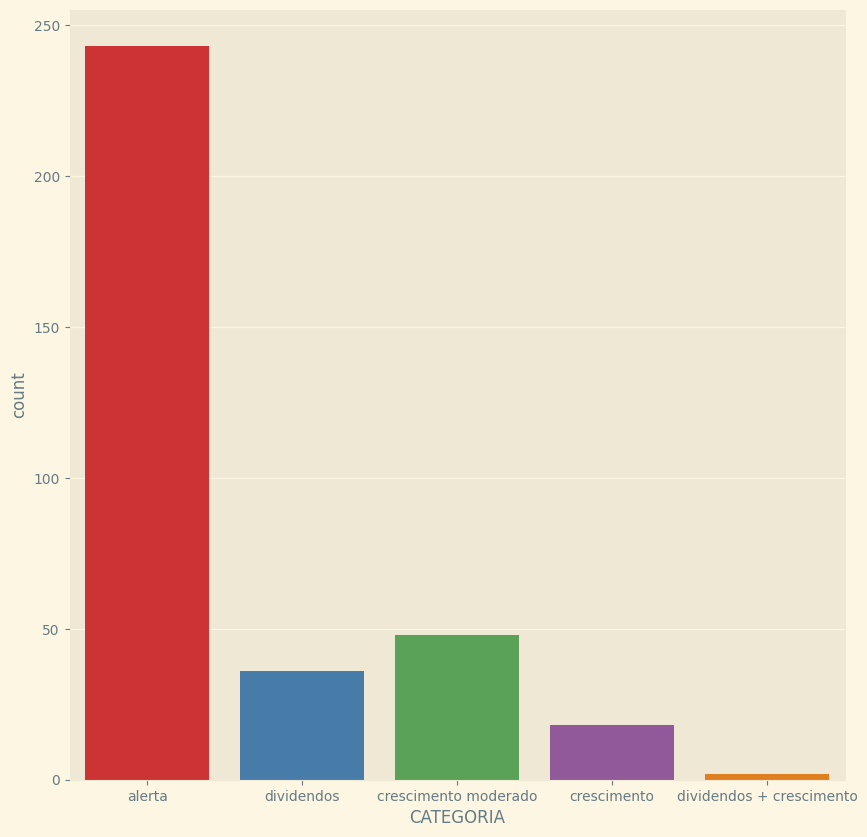

In [57]:
plt.figure(figsize=(10,10))
sns.countplot(x='CATEGORIA', data=dataset,palette='Set1')
plt.xticks()


C:\Users\Edu\AppData\Local\Temp\ipykernel_14700\3606804042.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax=ax);


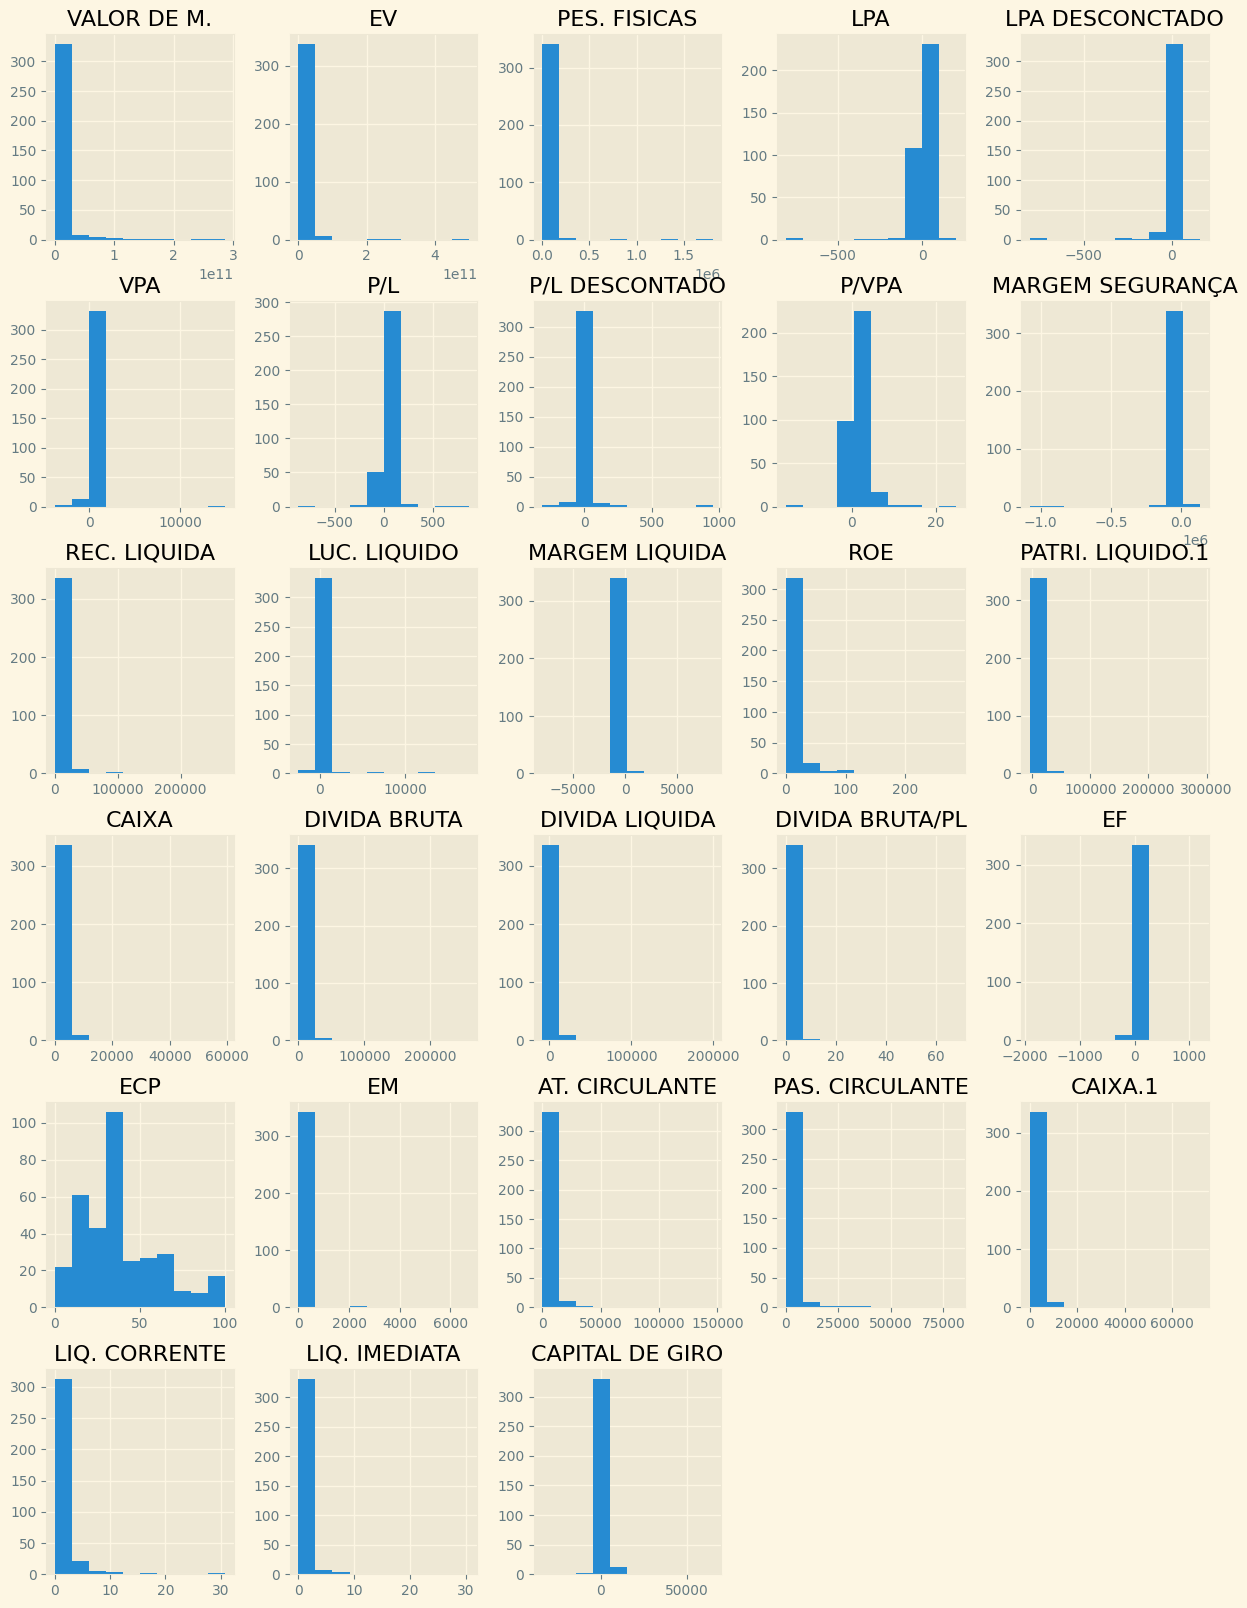

In [58]:
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
dataset.hist(ax=ax);


In [60]:
correlacao = dataset.corr(numeric_only=True)
print(correlacao)

                  VALOR DE M.        EV  PES. FISICAS       LPA  \
VALOR DE M.          1.000000  0.710625      0.268793  0.046066   
EV                   0.710625  1.000000      0.227690  0.035048   
PES. FISICAS         0.268793  0.227690      1.000000  0.010038   
LPA                  0.046066  0.035048      0.010038  1.000000   
LPA DESCONCTADO      0.047804  0.037377      0.012362  0.984485   
VPA                 -0.007354 -0.007771     -0.006719 -0.419872   
P/L                  0.036327  0.023970      0.007803  0.017999   
P/L DESCONTADO       0.033680  0.026517      0.001744  0.021647   
P/VPA                0.096432  0.061283     -0.014660  0.055433   
MARGEM SEGURANÇA     0.028835  0.020436      0.006799  0.424568   
REC. LIQUIDA         0.497979  0.874632      0.217443  0.030644   
LUC. LIQUIDO         0.627314  0.058750      0.141877  0.045857   
MARGEM LIQUIDA      -0.001781  0.000640     -0.000707  0.002286   
ROE                  0.023803 -0.002211     -0.033432  0.02108

<Axes: >

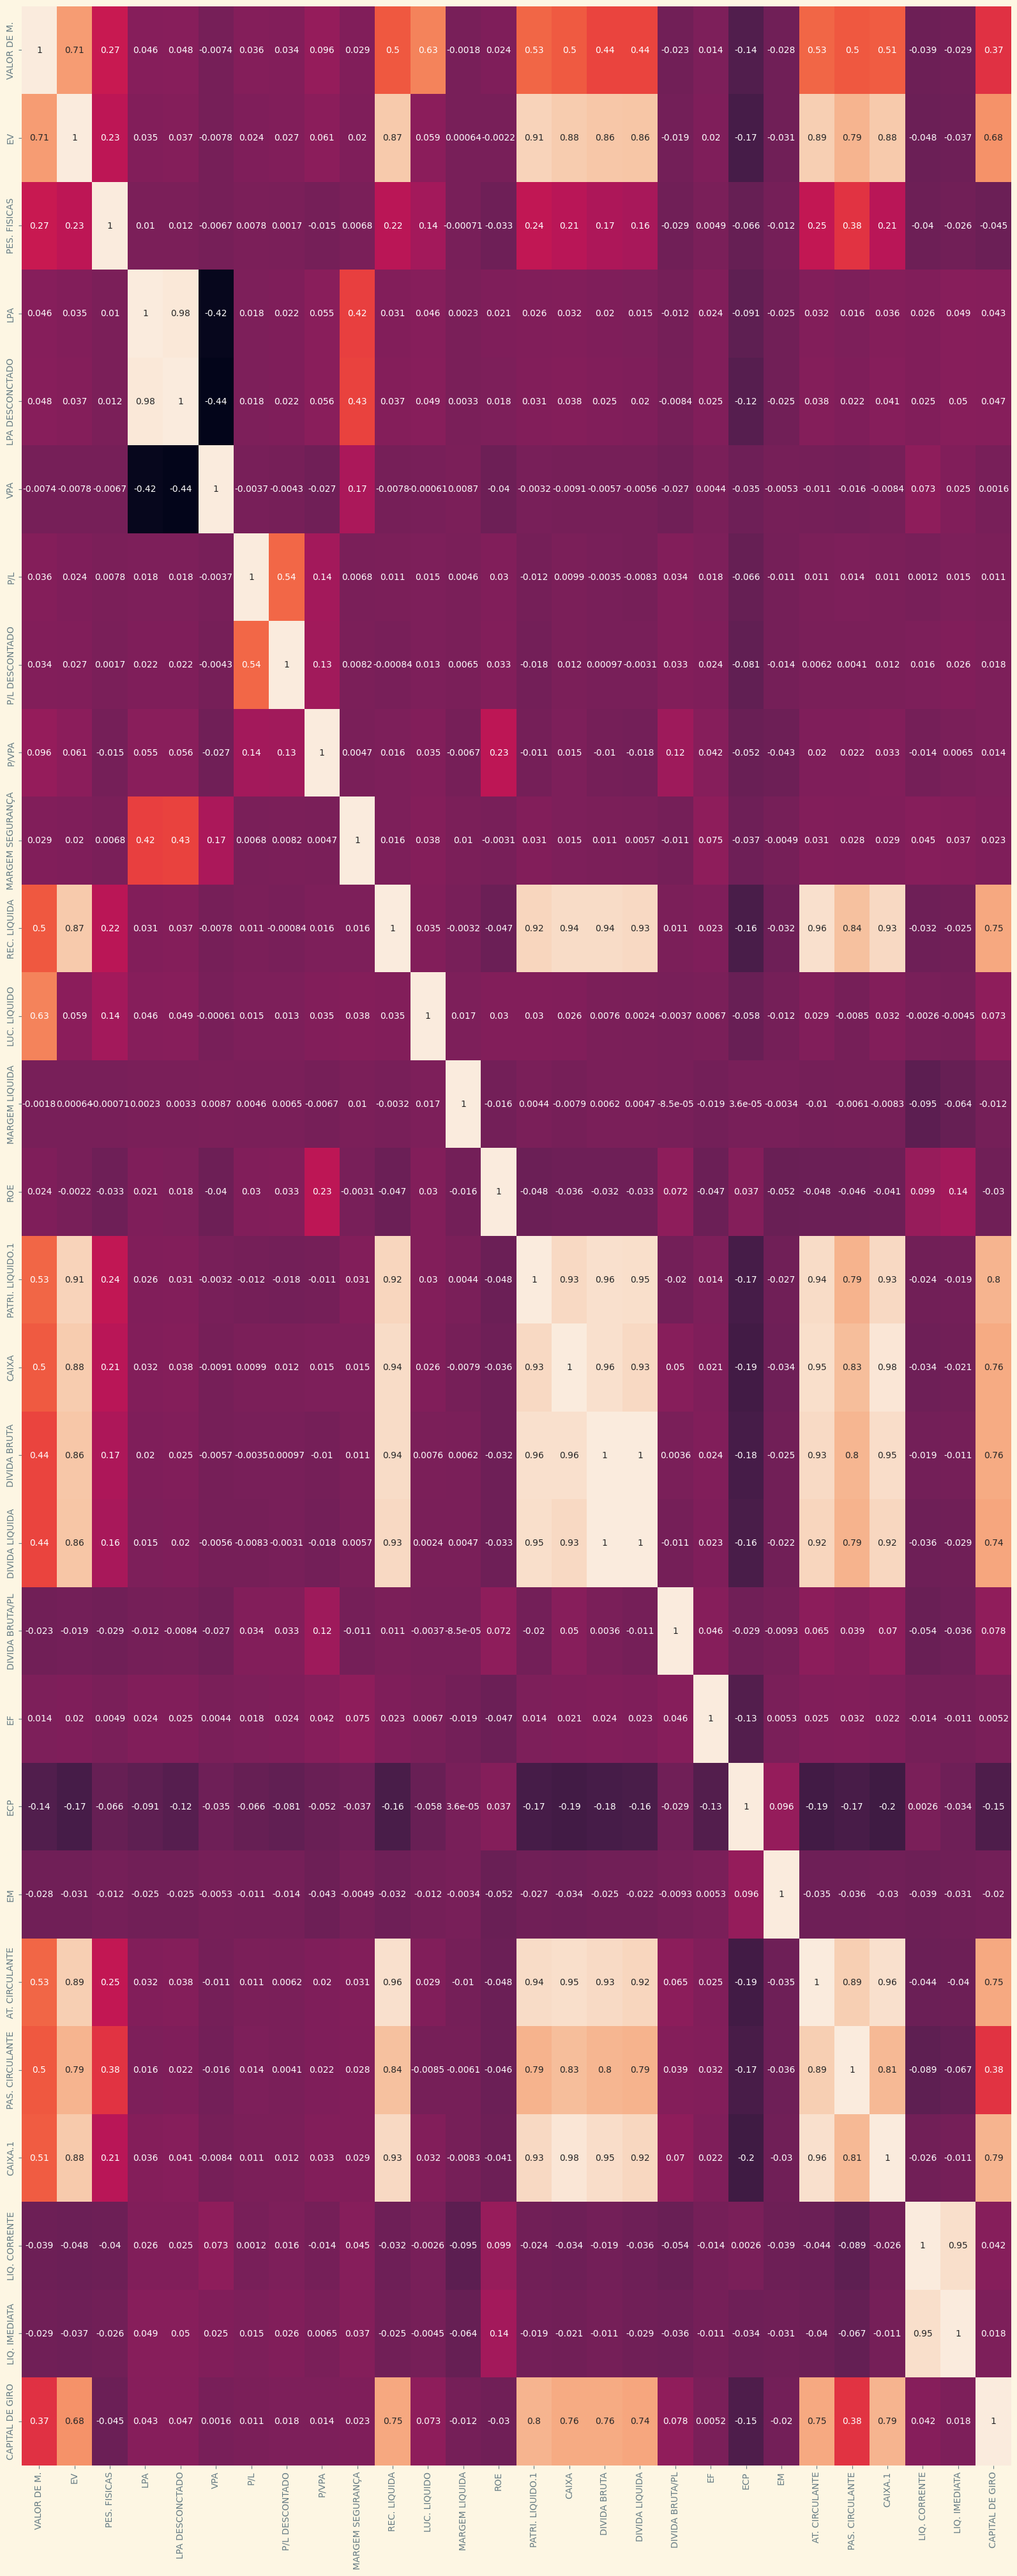

In [61]:
plt.figure(figsize=(20,50))
sns.heatmap(correlacao,annot=True,cbar=False)

In [62]:
dataset.columns

Index(['SITUAÇÃO', 'EMPRESA', 'SEGMENTO', 'VALOR DE M.', 'EV', 'PES. FISICAS',
       'CATEGORIA', 'LPA', 'LPA DESCONCTADO', 'VPA', 'P/L', 'P/L DESCONTADO',
       'P/VPA', 'MARGEM SEGURANÇA', 'REC. LIQUIDA', 'LUC. LIQUIDO',
       'MARGEM LIQUIDA', 'ROE', 'PATRI. LIQUIDO.1', 'CAIXA', 'DIVIDA BRUTA',
       'DIVIDA LIQUIDA', 'DIVIDA BRUTA/PL', 'EF', 'ECP', 'EM',
       'AT. CIRCULANTE', 'PAS. CIRCULANTE', 'CAIXA.1', 'LIQ. CORRENTE',
       'LIQ. IMEDIATA', 'CAPITAL DE GIRO'],
      dtype='object')

In [63]:
dataset = dataset.drop(['REC. LIQUIDA','CAIXA'],axis=1)


dataset = dataset.drop(['DIVIDA BRUTA','LPA','CAIXA.1'],axis=1)
correlacao = dataset.corr(numeric_only=True)
plt.figure(figsize=(20,50))


dataset = dataset.drop(['AT. CIRCULANTE','LIQ. CORRENTE'],axis=1)
correlacao = dataset.corr(numeric_only=True)


<Figure size 2000x5000 with 0 Axes>

<Axes: >

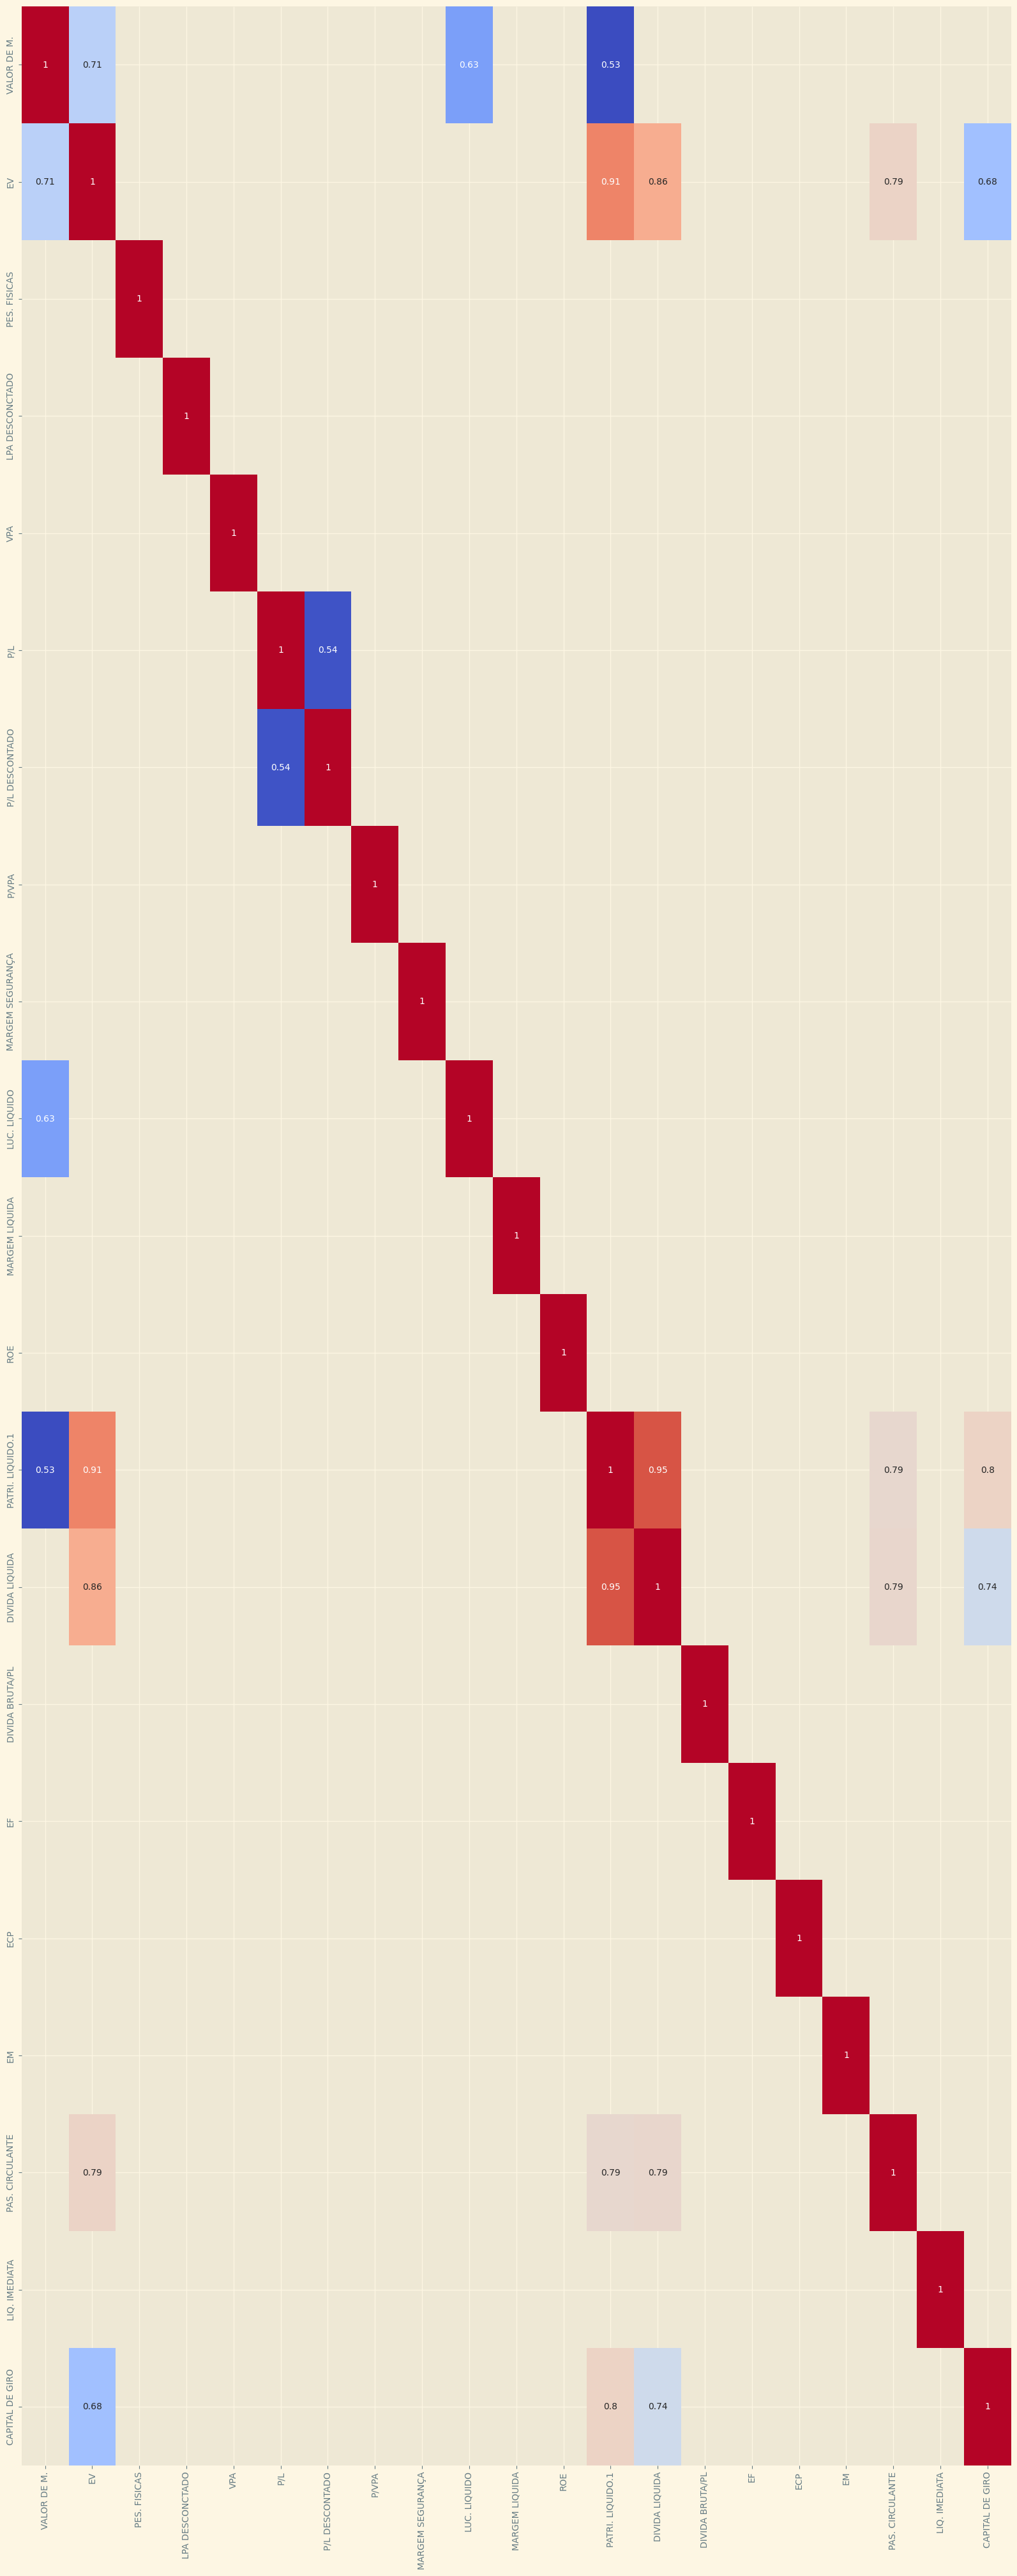

In [64]:

plt.figure(figsize=(20,50))
sns.heatmap(correlacao[correlacao.abs() > 0.5], annot=True, cmap='coolwarm', cbar=False)


In [65]:
dataset_original = dataset.copy()
dataset_original['SITUAÇÃO'].value_counts()

cat_attribs = dataset.select_dtypes(include=['object']).columns.tolist()
num_attribs = dataset.select_dtypes(include=['number']).columns.tolist()